In [1]:
import tensorflow.keras as keras

import config
from model import unet, losses
from utils import callbacks
from dataset_utils import mk_dataset


In [2]:
# Get Datasets
def make_datasets():
    train_ds = mk_dataset.mk_base_dataset(config.TR_SAT_PATH, config.TR_MAP_PATH)
    train_ds = mk_dataset.augument_ds(train_ds)
    train_ds = mk_dataset.post_process_ds(train_ds)
    
    valid_ds = mk_dataset.mk_base_dataset(config.VA_SAT_PATH, config.VA_MAP_PATH)
    valid_ds = mk_dataset.post_process_ds(valid_ds)
    return train_ds, valid_ds


In [3]:
# Define model
def compile_model(loss):
    model = unet.big_unet_model(
        input_shape=config.INPUT_SIZE,
        output_channels=config.OUT_CH,
    )
    # Compile the model
    optimizer = keras.optimizers.Adam()
    metrics = [keras.metrics.MeanIoU(num_classes=2)]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model


In [4]:
# Define Callbacks
def get_callbacks(filename):
    tboard_cb = callbacks.get_tboard_callback(str(config.LOG_PATH / filename))
    checkpoint_cb = callbacks.get_checkpoint_callback(
        str(config.CHECKPOINT_PATH / filename / filename)
    )
    callback_list = [tboard_cb, checkpoint_cb]
    return callback_list


In [6]:
train_ds, valid_ds = make_datasets()

loss = losses.TverskyLoss(name="Tversky")
model = compile_model(loss=loss)
NB_EPOCHS = 5
filename = model.loss.name
model_history = model.fit(
    train_ds,
    epochs=NB_EPOCHS,
    validation_data=valid_ds,
    steps_per_epoch=config.STEPS_PER_EPOCH,
    # validation_steps=5,
    callbacks=get_callbacks(filename),
)


# hist = train(
#     model=model,
#     train_ds=train_ds,
#     valid_ds=valid_ds,
#     NB_EPOCHS=30,
# )


Epoch 1/5
21/21 [==============================] - 21s 495ms/step - loss: 0.8302 - mean_io_u: 0.4657 - val_loss: 0.8617 - val_mean_io_u: 0.4643

Epoch 00001: saving model to /results/2111221109/checkpoints/Tversky/Tversky
Epoch 2/5
21/21 [==============================] - 9s 440ms/step - loss: 0.7628 - mean_io_u: 0.4654 - val_loss: 0.8582 - val_mean_io_u: 0.4643

Epoch 00002: saving model to /results/2111221109/checkpoints/Tversky/Tversky
Epoch 3/5
21/21 [==============================] - 10s 447ms/step - loss: 0.6960 - mean_io_u: 0.4668 - val_loss: 0.8034 - val_mean_io_u: 0.4643

Epoch 00003: saving model to /results/2111221109/checkpoints/Tversky/Tversky
Epoch 4/5
21/21 [==============================] - 9s 445ms/step - loss: 0.6427 - mean_io_u: 0.4707 - val_loss: 0.8738 - val_mean_io_u: 0.2579

Epoch 00004: saving model to /results/2111221109/checkpoints/Tversky/Tversky
Epoch 5/5
21/21 [==============================] - 9s 439ms/step - loss: 0.5678 - mean_io_u: 0.4843 - val_loss: 0.

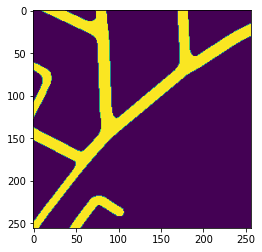

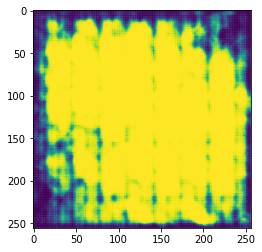

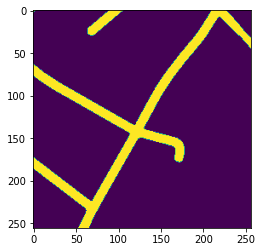

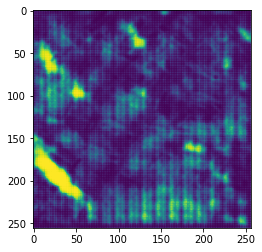

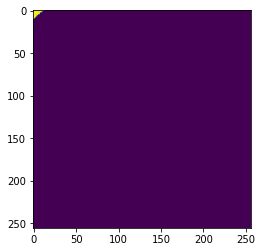

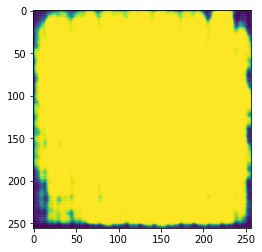

In [8]:
import matplotlib.pyplot as plt

for i,t in valid_ds.take(3):
    pred = model.predict(i)
    # plt.imshow(i[0])
    # plt.show()
    plt.imshow(t[0])
    plt.show()
    plt.imshow(pred[0])
    plt.show()


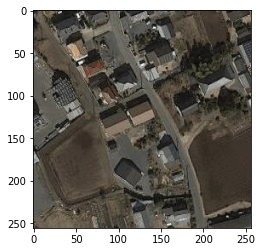

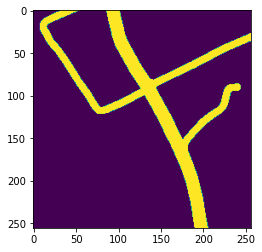

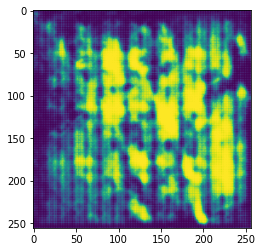

In [9]:
# sample_inp, sample_tar = next(iter(valid_ds))

# y_true = sample_tar
# y_pred = model.predict(sample_inp)


# plt.imshow(sample_inp[0])
# plt.show()
# plt.imshow(y_true[0])
# plt.show()
# plt.imshow(y_pred[0])
# plt.show()

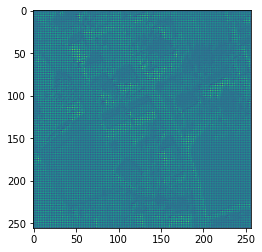

In [10]:
model = compile_model(loss=loss)
plt.imshow(model.predict(sample_inp)[0])

In [ ]:
model = compile_model(loss=loss)
model.load_weights('/results/2111171446/checkpoints/Tversky/Tversky')


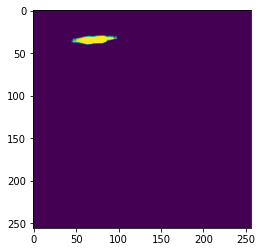

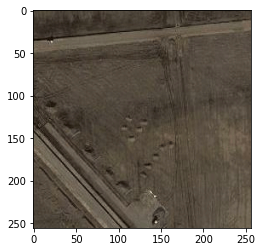

In [19]:
n=2
plt.imshow((model.predict(sample_inp))[n])
plt.show()
plt.imshow(sample_inp[n])
plt.show()
plt